In [6]:
import numpy as np
import matplotlib.pyplot as plt

# imoprt 
from models.least_squares import *
from models.synthetic_data import *

# optimization functions
from opt_algos.gradient_descent import *
from opt_algos.stochastic_gradient_descent import *
from opt_algos.accelerated_gradient_descent import *
from opt_algos.opt_diagnostics import *


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

model_name = "least squares"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# generate data

In [7]:
# sample least squares data
n = 100
d = 10
X, y = generate_LS_data(n, d, seed=34234)

In [8]:
# set up model
model = LeastSquares(X, y)

# analytic LS solution
beta_solution = model.get_solution()

# Gradient descent

In [9]:
%%time
opt_algo = 'gradient descent'

eta = 1/model.L_F

print 'eta: ' + str(eta)
GD_beta = gradient_descent(model, eta)['beta_history']
print

eta: 0.000952970621318
GD finished after 145 iterations

CPU times: user 3.93 ms, sys: 1.07 ms, total: 5 ms
Wall time: 4.07 ms


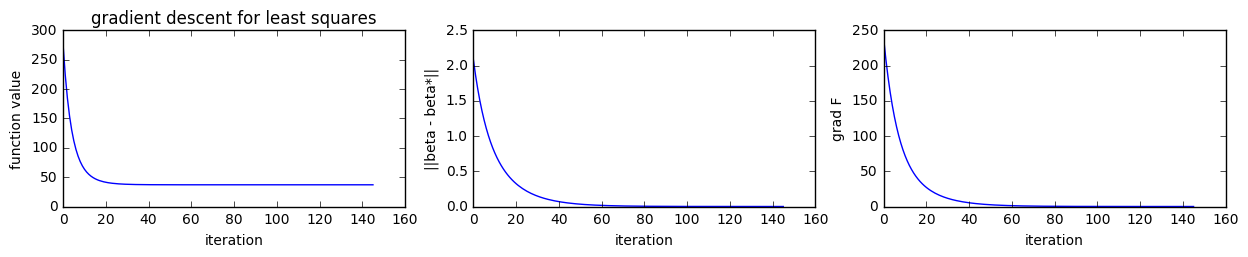

In [10]:
plot_opt_path(GD_beta, model, beta_solution, opt_algo)

# Accelerated gradient descent

In [11]:
%%time
opt_algo = 'accelerated gradient descent'

eta = 1/model.L_F

print 'eta: ' + str(eta)
AGD_beta = accelerated_gradient_descent(model, eta)['beta_history']
print

eta: 0.000952970621318
accelerated GD finished after 51 iterations

CPU times: user 3.29 ms, sys: 1.56 ms, total: 4.85 ms
Wall time: 3.64 ms


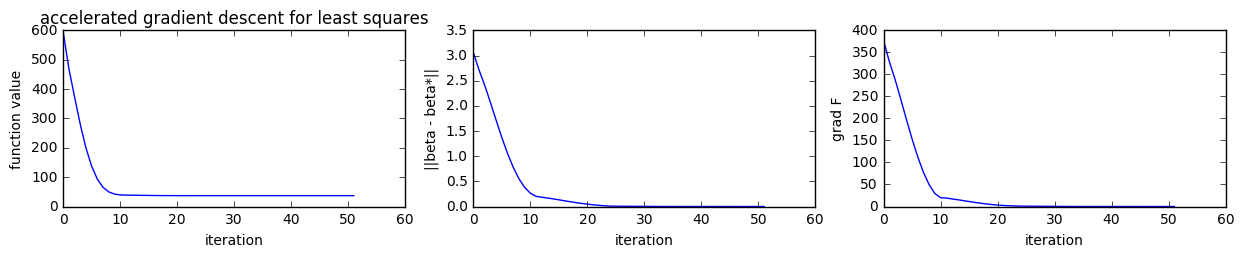

In [12]:
plot_opt_path(AGD_beta, model, beta_solution, opt_algo)

# Stochastic gradient descent

In [25]:
%%time
opt_algo = 'stochastic gradient descent'

eta = 2/model.L_F

print 'eta: ' + str(eta)
SGD_beta = stochastic_gradient_descent(model, eta, epsilon=1e-10)['beta_history']
print

eta: 0.00190594124264
SGD finished after 9999 iterations

CPU times: user 503 ms, sys: 3.21 ms, total: 506 ms
Wall time: 505 ms


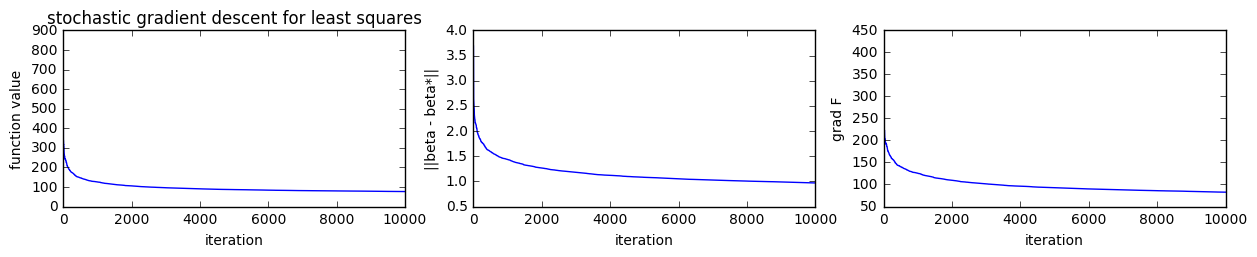

In [26]:
plot_opt_path(SGD_beta, model, beta_solution, opt_algo)